In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np

In [11]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

50000 train samples
10000 test samples
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [0]:
# input image dimensions
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

def create_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return model
# lr_decay = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0001 + 0.02 * math.pow(0.5, 1+epoch), verbose=True)

In [13]:
import os
try:
    os.environ['COLAB_TPU_ADDR']
    resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.contrib.distribute.initialize_tpu_system(resolver)
    strategy = tf.contrib.distribute.TPUStrategy(resolver)
    with strategy.scope():
        model = create_model()
        model.compile(
            optimizer=tf.train.AdamOptimizer(1e-3),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
except KeyError:
    model = create_model()
    model.compile(
        optimizer=tf.train.AdamOptimizer(1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
model.summary()

W0620 20:48:07.311097 140291050211200 tpu_strategy_util.py:56] TPU system %s has already been initialized. Reinitializing the TPU can cause previously created variables on TPU to be lost.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [0]:
from time import time

In [17]:
start_t=time()
history=model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    batch_size=256,
    epochs=10,
    steps_per_epoch=195,
    validation_data=(x_test[::2].astype(np.float32), y_test[::2].astype(np.float32)),
#     validation_freq=17
)
print("Time taken:",time()-start_t)

Epoch 1/10
195/195 [==============================] - 51s 263ms/step - loss: 0.9399 - acc: 0.6751 - val_loss: 0.8316 - val_acc: 0.7040
Epoch 2/10
195/195 [==============================] - 46s 236ms/step - loss: 0.8268 - acc: 0.7120 - val_loss: 0.7554 - val_acc: 0.7386
Epoch 3/10
195/195 [==============================] - 49s 252ms/step - loss: 0.7625 - acc: 0.7343 - val_loss: 0.7544 - val_acc: 0.7466
Epoch 4/10
195/195 [==============================] - 53s 274ms/step - loss: 0.6987 - acc: 0.7569 - val_loss: 0.6768 - val_acc: 0.7696
Epoch 5/10
192/195 [============================>.] - ETA: 0s - loss: 0.6557 - acc: 0.7695

KeyboardInterrupt: ignored

In [8]:
score = model.evaluate(x_test.astype(np.float32), y_test.astype(np.float32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 141us/sample - loss: 0.6025 - acc: 0.7997
Test loss: 0.6024597874164581
Test accuracy: 0.7997


In [0]:
import matplotlib.pyplot as plt

In [0]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(toimage(X[k]),interpolation='bicubic')
            k = k+1
    # show the plot
    plt.show()

Prediction:  horse 
Correct answer:  horse


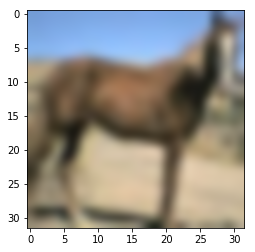

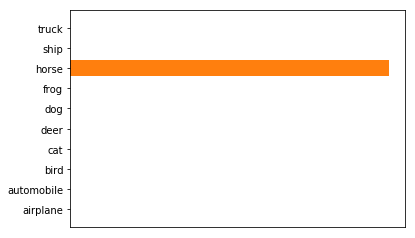

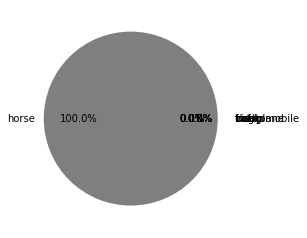

In [26]:
names =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
ck=np.random.randint(0,10000//8)
inp,y_inp=x_test.astype(np.float32)[ck*8:(ck+1)*8], y_test.astype(np.float32)[ck*8:(ck+1)*8]
logits=model.predict(inp)
ans=logits.argmax(axis=1)
cor=y_inp.argmax(axis=1)
logits=logits[0]
print("Prediction: ",names[int(ans[0])],"\nCorrect answer: ",names[int(cor[0])])
plt.imshow(inp[0],interpolation='bicubic')
plt.show()
plt.barh(range(len(logits)),logits,color='#ff7f0e')
plt.yticks(range(len(logits)),names)
plt.xticks([])
plt.show()
explode=np.zeros(10)
explode[ans]=0.1
plt.pie(logits,labels=names,autopct='%1.1f%%',explode=explode)
plt.show()

In [0]:
model.save_weights("model.h5")